<a href="https://colab.research.google.com/github/tjfgns6043/ML-Class/blob/main/%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=fc86f199c6a226b0c872bfa4473fe6aff9ff1e2b6081011daa11bd9ef425868d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#본인의 파일 경로로 지정
train_data = pd.read_csv('/content/gdrive/My Drive/train.csv')
test_data = pd.read_csv('/content/gdrive/My Drive/test.csv')

In [5]:
#test 데이터에는 예측해야할 "move_out(퇴거여부)"가 없는 데이터 -> 이를 예측하여 결과 파일로 캐글에 제출해야함!
print(train_data)
print(test_data)

          id     순번 계약구분  재계약횟수  거주개월    아파트 이름  아파트 ID  아파트 평점  호실고유번호   층  \
0      61187   9167   해지      3    75     용지아파트       2       7   61188   9   
1      70016  10398   유효     10   222     용지아파트       2       7   70016   7   
2      52239   7859   유효      3    80     용지아파트       2       7   52233   2   
3      85470  12689   유효     10   222  지산5단지아파트       3       8   85460   6   
4       7941   1161   해지      7   157    비둘기아파트       1       5    4750   8   
...      ...    ...  ...    ...   ...       ...     ...     ...     ...  ..   
60827  68464  10174   유효     11   241     용지아파트       2       7   68457  12   
60828  43649   6574   유효     10   222     용지아파트       2       7   38827   6   
60829   5864    853   해지      4    88    비둘기아파트       1       5    2669  12   
60830  22552   3361   유효     10   234    비둘기아파트       1       5   22543   1   
60831  22858   3407   해지      4    94    비둘기아파트       1       5   22852   3   

       ...    퇴거연도  거주연도   월세(원)    보증금(원)  대표나이  나

In [6]:
#데이터 결측치 확인
print("Train Data 결측치 확인: \n", train_data.isnull().sum())
print("-------------"*8)
print("Test Data 결측치 확인: \n", test_data.isnull().sum())

Train Data 결측치 확인: 
 id              0
순번              0
계약구분            0
재계약횟수           0
거주개월            0
아파트 이름          0
아파트 ID          0
아파트 평점          0
호실고유번호          0
층               0
평형대             0
계약자고유번호         0
계약서고유번호         0
입주연도            0
퇴거연도        42799
거주연도            0
월세(원)           0
보증금(원)          0
대표나이            0
나이              0
성별              0
결혼여부            0
거주자 수           0
move_out        0
dtype: int64
--------------------------------------------------------------------------------------------------------
Test Data 결측치 확인: 
 id             0
순번             0
계약구분           0
재계약횟수          0
거주개월           0
아파트 이름         0
아파트 ID         0
아파트 평점         0
호실고유번호         0
층              0
평형대            0
계약자고유번호        0
계약서고유번호        0
입주연도           0
퇴거연도       18343
거주연도           0
월세(원)          0
보증금(원)         0
대표나이           0
나이             0
성별             0
결혼여부           0
거주자 수          0
dtype: int64


### 데이터 전처리  
  
- 퇴거 연도 결측치 처리
- train 60832개 중 42799 약 70%
- test 26072개 중 18343 약 70% 
- 전체 데이터의 70%가 결측치이므로 중요도가 낮다고 판단하여 값을 채워넣는 대신 column 삭제선택

In [7]:
train_data = train_data.drop(['퇴거연도'], axis='columns')
test_data = test_data.drop(['퇴거연도'], axis='columns')

In [8]:
#결측치가 제거되었고 숫자형 자료형과 object형 자료형 갯수를 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60832 entries, 0 to 60831
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        60832 non-null  int64 
 1   순번        60832 non-null  int64 
 2   계약구분      60832 non-null  object
 3   재계약횟수     60832 non-null  int64 
 4   거주개월      60832 non-null  int64 
 5   아파트 이름    60832 non-null  object
 6   아파트 ID    60832 non-null  int64 
 7   아파트 평점    60832 non-null  int64 
 8   호실고유번호    60832 non-null  int64 
 9   층         60832 non-null  int64 
 10  평형대       60832 non-null  int64 
 11  계약자고유번호   60832 non-null  int64 
 12  계약서고유번호   60832 non-null  int64 
 13  입주연도      60832 non-null  int64 
 14  거주연도      60832 non-null  int64 
 15  월세(원)     60832 non-null  int64 
 16  보증금(원)    60832 non-null  int64 
 17  대표나이      60832 non-null  int64 
 18  나이        60832 non-null  int64 
 19  성별        60832 non-null  object
 20  결혼여부      60832 non-null  object
 21  거주자 수     60

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26072 entries, 0 to 26071
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       26072 non-null  int64 
 1   순번       26072 non-null  int64 
 2   계약구분     26072 non-null  object
 3   재계약횟수    26072 non-null  int64 
 4   거주개월     26072 non-null  int64 
 5   아파트 이름   26072 non-null  object
 6   아파트 ID   26072 non-null  int64 
 7   아파트 평점   26072 non-null  int64 
 8   호실고유번호   26072 non-null  int64 
 9   층        26072 non-null  int64 
 10  평형대      26072 non-null  int64 
 11  계약자고유번호  26072 non-null  int64 
 12  계약서고유번호  26072 non-null  int64 
 13  입주연도     26072 non-null  int64 
 14  거주연도     26072 non-null  int64 
 15  월세(원)    26072 non-null  int64 
 16  보증금(원)   26072 non-null  int64 
 17  대표나이     26072 non-null  int64 
 18  나이       26072 non-null  int64 
 19  성별       26072 non-null  object
 20  결혼여부     26072 non-null  object
 21  거주자 수    26072 non-null  int64 
dty

In [10]:
#레이블 값인 move_out의 형태 확인 0: 퇴거 / 1: 미퇴거
#미퇴거 값이 압도적으로 많음
train_data['move_out'].value_counts()

1    57882
0     2950
Name: move_out, dtype: int64

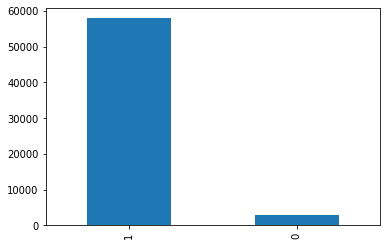

In [11]:
#시각화
train_data['move_out'].value_counts().plot.bar()

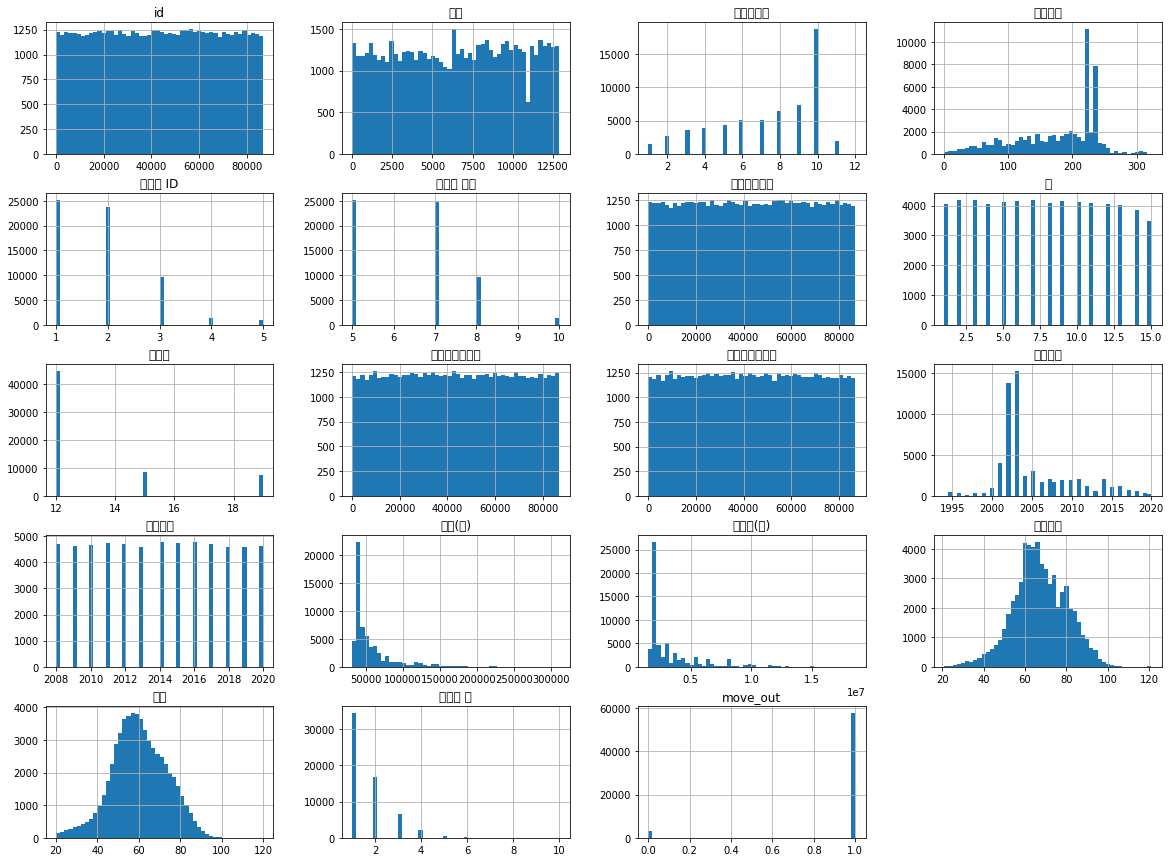

In [12]:
%matplotlib inline
#전체적인 데이터 분포 확인
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # For Windows
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
#object형 데이터 확인
print(train_data['계약구분'].value_counts())
print("------------------------------")
print(train_data['아파트 이름'].value_counts())
print("------------------------------")
print(train_data['성별'].value_counts())
print("------------------------------")
print(train_data['결혼여부'].value_counts())

유효    42799
해지    18033
Name: 계약구분, dtype: int64
------------------------------
비둘기아파트      25228
용지아파트       23792
지산5단지아파트     9591
까치아파트        1329
강남아파트         892
Name: 아파트 이름, dtype: int64
------------------------------
여    35812
남    25020
Name: 성별, dtype: int64
------------------------------
미혼    52013
기혼     8819
Name: 결혼여부, dtype: int64


### 원-핫 인코딩
- get_dummies()를 사용한 원-핫 인코딩
- 객체타입 데이터 변환

In [14]:
#범주형 변수를 get_dummies() 함수 사용하여 전처리

print("Train Data 원본:\n", list(train_data.columns), "\n")
train_data = pd.get_dummies(train_data, drop_first=True)
print("get_dummies 후의 특성:\n", list(train_data.columns))

print("---------------------------------------------------------")

print("테스트 데이터 원본 특성:\n", list(test_data.columns), "\n")
test_data = pd.get_dummies(test_data, drop_first=True)
print("get_dummies 후의 특성:\n", list(test_data.columns))

Train Data 원본:
 ['id', '순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수', 'move_out'] 

get_dummies 후의 특성:
 ['id', '순번', '재계약횟수', '거주개월', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수', 'move_out', '계약구분_해지', '아파트 이름_까치아파트', '아파트 이름_비둘기아파트', '아파트 이름_용지아파트', '아파트 이름_지산5단지아파트', '성별_여', '결혼여부_미혼']
---------------------------------------------------------
테스트 데이터 원본 특성:
 ['id', '순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수'] 

get_dummies 후의 특성:
 ['id', '순번', '재계약횟수', '거주개월', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수', '계약구분_해지', '아파트 이름_까치아파트', '아파트 이름_비둘기아파트', '아파트 이름_용지아파트', '아파트 이름_지산5단

In [15]:
train_data.all

<bound method NDFrame._add_numeric_operations.<locals>.all of           id     순번  재계약횟수  거주개월  아파트 ID  아파트 평점  호실고유번호   층  평형대  계약자고유번호  \
0      61187   9167      3    75       2       7   61188   9   12    39791   
1      70016  10398     10   222       2       7   70016   7   12    35240   
2      52239   7859      3    80       2       7   52233   2   12    47631   
3      85470  12689     10   222       3       8   85460   6   19     5959   
4       7941   1161      7   157       1       5    4750   8   19    51081   
...      ...    ...    ...   ...     ...     ...     ...  ..  ...      ...   
60827  68464  10174     11   241       2       7   68457  12   12    20968   
60828  43649   6574     10   222       2       7   38827   6   12    19359   
60829   5864    853      4    88       1       5    2669  12   12    79320   
60830  22552   3361     10   234       1       5   22543   1   12    69387   
60831  22858   3407      4    94       1       5   22852   3   12    75661   

 

In [16]:
test_data.all

<bound method NDFrame._add_numeric_operations.<locals>.all of           id     순번  재계약횟수  거주개월  아파트 ID  아파트 평점  호실고유번호   층  평형대  계약자고유번호  \
0      77315  11572      5   106       3       8   77315   6   12     2414   
1       9515   1387      8   186       1       5    6460   1   12    61360   
2       1668    231     10   222       4      10    7227   4   15    14166   
3      57273   8567      7   156       2       7   57271  13   12    42576   
4      19049   2817      3    79       1       5   19042   3   12    81873   
...      ...    ...    ...   ...     ...     ...     ...  ..  ...      ...   
26067  81241  12110      7   162       3       8   81236  11   12    10828   
26068  83076  12351      8   192       3       8   83071   6   19     9664   
26069  25820   3846     10   234       1       5   25810  14   12    69592   
26070  36133   5417     10   244       1       5   41721  14   19    70613   
26071    680     92      9   214       5       7   16356   7   15    16011   

 

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60832 entries, 0 to 60831
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               60832 non-null  int64
 1   순번               60832 non-null  int64
 2   재계약횟수            60832 non-null  int64
 3   거주개월             60832 non-null  int64
 4   아파트 ID           60832 non-null  int64
 5   아파트 평점           60832 non-null  int64
 6   호실고유번호           60832 non-null  int64
 7   층                60832 non-null  int64
 8   평형대              60832 non-null  int64
 9   계약자고유번호          60832 non-null  int64
 10  계약서고유번호          60832 non-null  int64
 11  입주연도             60832 non-null  int64
 12  거주연도             60832 non-null  int64
 13  월세(원)            60832 non-null  int64
 14  보증금(원)           60832 non-null  int64
 15  대표나이             60832 non-null  int64
 16  나이               60832 non-null  int64
 17  거주자 수            60832 non-null  int64
 18  move_o

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26072 entries, 0 to 26071
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               26072 non-null  int64
 1   순번               26072 non-null  int64
 2   재계약횟수            26072 non-null  int64
 3   거주개월             26072 non-null  int64
 4   아파트 ID           26072 non-null  int64
 5   아파트 평점           26072 non-null  int64
 6   호실고유번호           26072 non-null  int64
 7   층                26072 non-null  int64
 8   평형대              26072 non-null  int64
 9   계약자고유번호          26072 non-null  int64
 10  계약서고유번호          26072 non-null  int64
 11  입주연도             26072 non-null  int64
 12  거주연도             26072 non-null  int64
 13  월세(원)            26072 non-null  int64
 14  보증금(원)           26072 non-null  int64
 15  대표나이             26072 non-null  int64
 16  나이               26072 non-null  int64
 17  거주자 수            26072 non-null  int64
 18  계약구분_해

In [19]:
#모든 특성간의 표준 상관계수 확인
corr_matrix = train_data.corr()
corr_matrix

,id,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,...,나이,거주자 수,move_out,계약구분_해지,아파트 이름_까치아파트,아파트 이름_비둘기아파트,아파트 이름_용지아파트,아파트 이름_지산5단지아파트,성별_여,결혼여부_미혼
id,1.000000,0.999941,0.063241,0.017979,0.516139,0.668878,0.991232,0.019256,0.071872,-0.665379,...,0.043079,0.019232,0.013899,-0.059198,-0.245993,-0.746904,0.407833,0.631062,0.022233,-0.010772
순번,0.999941,1.000000,0.063255,0.017921,0.515963,0.669528,0.990947,0.018722,0.069819,-0.665678,...,0.043261,0.018430,0.013892,-0.059122,-0.247173,-0.748948,0.411711,0.629245,0.022396,-0.010196
재계약횟수,0.063241,0.063255,1.000000,0.942603,0.086119,0.093946,0.060620,0.003885,0.060340,-0.369755,...,0.180503,-0.100148,0.223704,-0.379368,0.026734,-0.094093,0.050642,0.044116,0.091183,-0.038725
거주개월,0.017979,0.017921,0.942603,1.000000,0.031459,0.032975,0.016208,0.010786,0.056724,-0.336723,...,0.159265,-0.065414,0.217926,-0.342978,0.013245,-0.031802,0.015670,0.014151,0.074880,-0.041374
아파트 ID,0.516139,0.515963,0.086119,0.031459,1.000000,0.906226,0.556867,-0.025630,0.122690,-0.786237,...,0.007463,0.054812,0.019568,-0.050305,0.371150,-0.800430,0.155394,0.579158,0.031797,-0.016498
아파트 평점,0.668878,0.669528,0.093946,0.032975,0.906226,1.000000,0.676979,-0.013638,0.135156,-0.819377,...,0.027834,0.049210,0.019963,-0.061336,0.420125,-0.914569,0.378746,0.541705,0.027245,-0.022651
호실고유번호,0.991232,0.990947,0.060620,0.016208,0.556867,0.676979,1.000000,0.025154,0.061218,-0.673332,...,0.038921,0.018399,0.013855,-0.055311,-0.206918,-0.740007,0.370273,0.631206,0.024554,-0.006338
층,0.019256,0.018722,0.003885,0.010786,-0.025630,-0.013638,0.025154,1.000000,-0.005821,0.012489,...,-0.053811,0.014337,0.005402,-0.012765,0.001737,0.009672,0.014022,-0.023948,0.013457,-0.011941
평형대,0.071872,0.069819,0.060340,0.056724,0.122690,0.135156,0.061218,-0.005821,1.000000,-0.121853,...,-0.027575,0.301969,0.023630,-0.044323,0.107074,-0.112257,0.045611,0.043389,-0.122419,-0.235493
계약자고유번호,-0.665379,-0.665678,-0.369755,-0.336723,-0.786237,-0.819377,-0.673332,0.012489,-0.121853,1.000000,...,-0.067717,-0.061193,-0.015987,0.017145,-0.162848,0.781628,-0.280526,-0.574949,-0.066256,0.053651


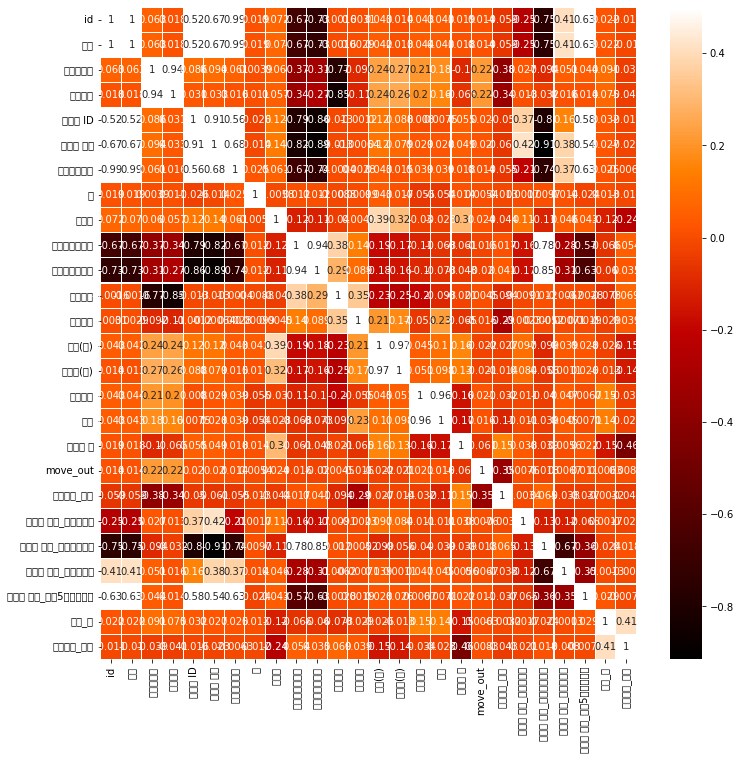

In [20]:
#상관관계 파악 히트맵
#재계약 횟수와 거주개월이 move_out과 상대적으로 높은 상관관계를 가지고 있음
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
            linecolor='white', annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7eb713ed0>,
      dtype=object)

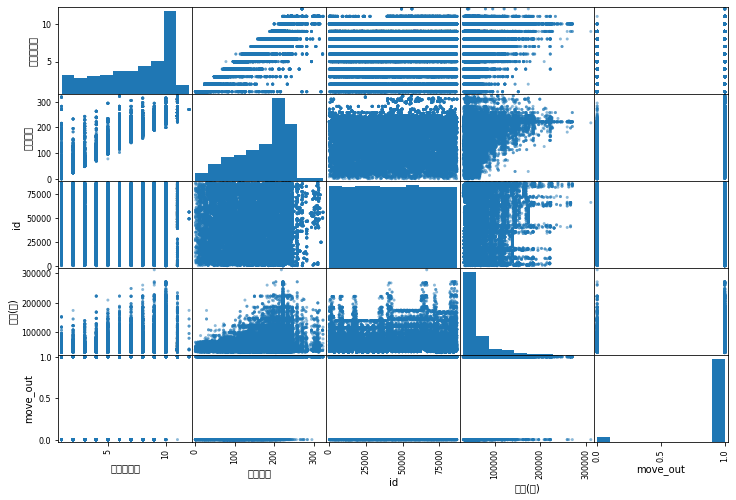

In [21]:
#move_out과 상관관계 높은 순으로 뽑아서 시각화
from pandas.plotting import scatter_matrix
attributes = ["재계약횟수", "거주개월", "id", "월세(원)", "move_out"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

In [22]:
X_train = train_data.drop(['move_out'], axis = 1)
y_train = train_data['move_out']
X_test = test_data


### 데이터 불균형 해결하기
1. 언더샘플링 : 데이터의 소실이 매우 크고, 때로는 중요한 정상데이터를 잃게 될 수 있다. (다수의 데이터를 소수의 데이터 크기에 맞춤)
2. 오버샘플링 : 정보가 손실되지 않는다는 장점이 있으나, 복제된 관측치를 원래 데이터 세트에 추가하기만하면 여러 유형의 관측치를 다수 추가하여 오버피팅을 초래할 수 있다. (소수의 데이터를 다수의 데이터 크기에 맞춤)

### SMOTE(synthetic minority oversampling technique) 이란? 
합성 소수 샘플링 기술로 다수 클래스를 샘플링하고 기존 소수 샘플을 보간(알려진 지점의 값 사이(중간)에 위치한 값을 알려진 값으로부터 추정하는 것)하여 새로운 소수 인스턴스를 합성해낸다.
일반적인 경우 성공적으로 작동하지만, 소수데이터들 사이를 보간하여 작동하기 때문에 모델링셋의 소수데이터들 사이의 특성만을 반영하고 새로운 사례의 데이터 예측엔 취약할 수 있다

관련 링크 : https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

In [23]:
#데이터 불균형 해결을 위해 오버 샘플링 SMOTE사용
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)



print('\n SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('\n SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (60832, 25) (60832,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (115764, 25) (115764,)

 SMOTE 적용 전 레이블 값 분포: 
 1    57882
0     2950
Name: move_out, dtype: int64

 SMOTE 적용 후 레이블 값 분포: 
 1    57882
0    57882
Name: move_out, dtype: int64


### 모델 학습
- 의사결정트리

In [43]:
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
dtree = DecisionTreeClassifier()

grid_parameters = {"max_depth": [1, 2, 3, 4],  #트리의 최대 깊이 설정
                   "min_samples_split": [2, 3, 4] #노드 사이의 최소 샘플갯수
                   }

grid_dtree = GridSearchCV(dtree, param_grid=grid_parameters, cv=3, refit=True)

grid_dtree.fit(X_train_over, y_train_over)

scores_df = pd.DataFrame(grid_dtree.cv_results_)




In [49]:
print(scores_df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.120552      0.003121         0.010766        0.000672   
1        0.126540      0.004253         0.010353        0.000413   
2        0.120950      0.002523         0.010335        0.000302   
3        0.188003      0.007806         0.010943        0.000144   
4        0.192401      0.010397         0.010732        0.000342   
5        0.182754      0.005051         0.010446        0.000372   
6        0.240984      0.004441         0.011278        0.000092   
7        0.237354      0.001333         0.010764        0.000141   
8        0.238560      0.005237         0.010885        0.000226   
9        0.297536      0.003838         0.011094        0.000396   
10       0.300725      0.003141         0.011292        0.000039   
11       0.300807      0.006237         0.011552        0.000641   

   param_max_depth param_min_samples_split  \
0                1                       2   
1                1     

In [50]:
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

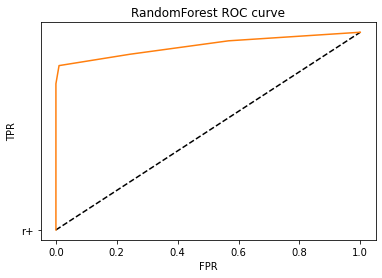

In [51]:
fpr, tpr, thresholds = roc_curve(y_train_over, grid_dtree.predict_proba(X_train_over)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

### 모델 성능 평가
- 이번 기계학습 경진대회 평가방식은 "AUC(Area Under the ROC Curve)" 입니다.
- AUC 값의 범위는 0~1이며 값이 클수록 예측의 정확도가 높다고 할 수 있습니다.
- 불균형한 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표입니다.

### 그리드 탐색 성능 평가

In [52]:
from sklearn.metrics import roc_auc_score

print('Train AUC = %.4f' % roc_auc_score(y_train_over, grid_dtree.predict_proba(X_train_over)[:,1]))


Train AUC = 0.9307


In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred = grid_dtree.predict(X_train_over)

confusion = confusion_matrix(y_train_over, y_pred)

print(confusion_matrix(y_train_over, y_pred))
print(classification_report(y_train_over, y_pred))

[[57288   594]
 [ 9769 48113]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     57882
           1       0.99      0.83      0.90     57882

    accuracy                           0.91    115764
   macro avg       0.92      0.91      0.91    115764
weighted avg       0.92      0.91      0.91    115764



### 랜덤포레스트 성능평가

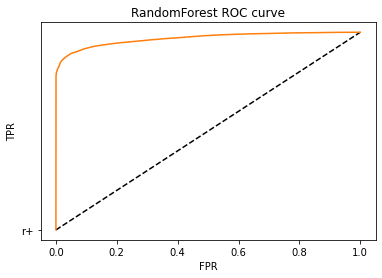

In [54]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train_over, y_train_over)

fpr, tpr, thresholds = roc_curve(y_train_over, rnd_clf.predict_proba(X_train_over)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

In [55]:
print('Train AUC = %.4f' % roc_auc_score(y_train_over, rnd_clf.predict_proba(X_train_over)[:,1]))

Train AUC = 0.9684


In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred = rnd_clf.predict(X_train_over)

confusion = confusion_matrix(y_train_over, y_pred)

print(confusion_matrix(y_train_over, y_pred))
print(classification_report(y_train_over, y_pred))

[[57491   391]
 [10567 47315]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     57882
           1       0.99      0.82      0.90     57882

    accuracy                           0.91    115764
   macro avg       0.92      0.91      0.90    115764
weighted avg       0.92      0.91      0.90    115764



###에이다 부스트 성능평가
약한 분류기(weak classifier)들이 상호보완 하도록 순차적(sequential)으로 학습하고, 이들을 조합하여 최종적으로 강한 분류기(strong classifier)의 성능을 향상시키는 것입니다.

사이킷런은 SAMME라는 에이다부스트의 다중 클래스 버전을 사용합니다. 클래스가 두 개뿐일 때는 SAMME가 에이다부스트와 동일합니다. 예측기가 클래스의 확률을 추정할 수 있다면 (즉, predict_proba() 메서드가 있다면) 사이킷런은 SAMME.R(끝의 R은 ‘Real’을 말합니다 )이라는 SAMME의 변종을 사용합니다. 이 알고리즘은 예측값 대신 클래스 확률에 기반하며 일반적으로 성능이 더 좋습니다

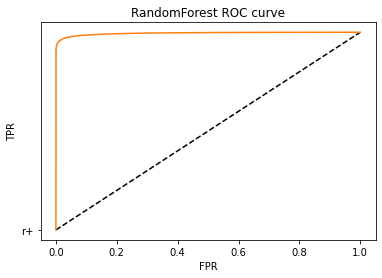

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=200 , algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_over, y_train_over)


fpr, tpr, thresholds = roc_curve(y_train_over, ada_clf.predict_proba(X_train_over)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()

In [58]:
print('Train AUC = %.4f' % roc_auc_score(y_train_over, ada_clf.predict_proba(X_train_over)[:,1]))

Train AUC = 0.9948


In [59]:
y_pred = ada_clf.predict(X_train_over)

confusion = confusion_matrix(y_train_over, y_pred)

print(confusion_matrix(y_train_over, y_pred))
print(classification_report(y_train_over, y_pred))

[[57828    54]
 [ 4636 53246]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     57882
           1       1.00      0.92      0.96     57882

    accuracy                           0.96    115764
   macro avg       0.96      0.96      0.96    115764
weighted avg       0.96      0.96      0.96    115764



### 캐글 submission 방법   

- 제공해드린 Test 데이터에 대한 submission을 제출해야합니다.
- Test 데이터를 보시면, id 컬럼이 있는 것을 확인할 수 있습니다.
- 각 id에 해당하는 move_out(퇴거여부)을 예측하고 결과로 제출해주시면 됩니다.

In [60]:
test_predicted = ada_clf.predict(X_test)

In [61]:
sample_sub = pd.DataFrame({'id': X_test['id'], 'move_out': test_predicted})

In [62]:
sample_sub

,id,move_out
0,77315,1
1,9515,1
2,1668,1
3,57273,1
4,19049,1
...,...,...
26067,81241,1
26068,83076,1
26069,25820,1
26070,36133,1


In [63]:
sample_sub.to_csv("baseline_submission.csv", index=False)